DATASET: https://data.mendeley.com/datasets/3f83gxmv57/2




## IMPORTING LIBRARIES

In [8]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
    --------------------------------------- 0.2/12.7 MB 5.9 MB/s eta 0:00:03
   - -------------------------------------- 0.3/12.7 MB 4.1 MB/s eta 0:00:04
   - -------------------------------------- 0.5/12.7 MB 4.2 MB/s eta 0:00:03
   - -------------------------------------- 0.6/12.7 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/12.7 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/12.7 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/12.7 MB 3.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/12.7 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.5/12.7 MB 3.5 MB/s eta 0:00:04
   ----- ---------------------------------- 1.7/12.7 MB 3.6 MB/s eta 0:00:04
   ------ --------------------------------- 1.9/12.7 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.7 MB 3.7 MB/s eta 0:00:03
   ---

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


## LOADING AND SPLITTING THE DATA

In [2]:
Categories=['Black spot','canker','greening','healthy','Melanose']


In [7]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='Leaves'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Black spot
loaded category:Black spot successfully
loading... category : canker
loaded category:canker successfully
loading... category : greening
loaded category:greening successfully
loading... category : healthy
loaded category:healthy successfully
loading... category : Melanose
loaded category:Melanose successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,0.615686,0.603922,0.686275,0.615425,0.603660,0.686010,0.610159,0.598375,0.678909,0.611658,...,0.602998,0.591233,0.665656,0.604990,0.593226,0.670268,0.605323,0.593559,0.668084,0
3,0.747545,0.735780,0.818133,0.744913,0.733148,0.815501,0.742675,0.730929,0.813230,0.744315,...,0.746951,0.735186,0.817539,0.745078,0.733314,0.815667,0.745098,0.733333,0.815686,0
4,0.755388,0.735804,0.821387,0.752934,0.735798,0.818213,0.751800,0.732811,0.816991,0.749553,...,0.731324,0.719559,0.801884,0.732978,0.721214,0.798686,0.732410,0.720646,0.802447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,0.240105,0.200938,0.063634,0.241783,0.210276,0.069158,0.227363,0.192984,0.064577,0.207284,...,0.279953,0.319200,0.325634,0.243386,0.281963,0.234130,0.246004,0.285418,0.187263,4
605,0.165602,0.157807,0.166616,0.166986,0.159490,0.162513,0.156764,0.155802,0.153959,0.150853,...,0.394296,0.360037,0.286490,0.492223,0.446277,0.369662,0.600845,0.546456,0.457737,4
606,0.195346,0.204692,0.128061,0.255137,0.270699,0.169157,0.231961,0.238008,0.178372,0.253710,...,0.629652,0.563044,0.445590,0.627494,0.561003,0.443394,0.580093,0.521206,0.407502,4
607,0.327335,0.339926,0.248191,0.448439,0.432805,0.326547,0.459534,0.442984,0.329148,0.449932,...,0.570059,0.510257,0.381067,0.497348,0.438166,0.319033,0.376081,0.315847,0.222576,4


In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
     

Splitted Successfully


## TRAINING THE MODEL AND USING GRIDSEARCH FOR PARAMETER TUNING

In [9]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
print("Parameters are done.")
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
Parameters are done.
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

## EVALUATING THE MODEL

In [10]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 3, 0, 3, 2, 2, 1, 2, 2, 3, 2, 1, 1,
       1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 4, 0, 0, 2,
       3, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 3, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 3, 1, 0, 0, 2, 0, 1, 1, 3,
       1, 0, 1, 0, 1, 2, 0, 3, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       3, 0, 2, 2, 0, 1, 3, 2, 2, 0, 1, 2])

In [11]:
print("The actual data is:")
np.array(y_test)
     

The actual data is:


array([1, 2, 0, 2, 2, 1, 0, 2, 3, 2, 3, 2, 3, 0, 2, 1, 2, 2, 3, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 4, 4, 0, 2,
       3, 0, 3, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 3, 2, 0, 1, 2, 0, 1, 0,
       2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 3, 1, 2, 0, 2, 0, 1, 1, 3,
       1, 0, 1, 0, 1, 2, 0, 3, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1,
       3, 0, 2, 2, 2, 1, 3, 2, 2, 0, 1, 2])

In [13]:
print(f"The model is {accuracy_score(y_test, y_pred) * 100:.2f}% accurate")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


The model is 84.43% accurate
Confusion Matrix:
[[27  0  7  0  0]
 [ 1 32  0  0  0]
 [ 7  1 33  0  0]
 [ 2  0  0 10  0]
 [ 1  0  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        34
           1       0.97      0.97      0.97        33
           2       0.82      0.80      0.81        41
           3       1.00      0.83      0.91        12
           4       1.00      0.50      0.67         2

    accuracy                           0.84       122
   macro avg       0.90      0.78      0.82       122
weighted avg       0.85      0.84      0.85       122



In [14]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


In [15]:
import os
import pickle
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

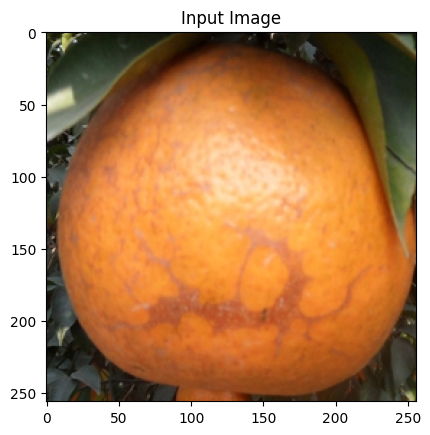

The predicted image is: Melanose
Black spot = 0.50%
canker = 2.93%
greening = 0.33%
healthy = 0.35%
Melanose = 95.89%


In [17]:
# Load the pre-trained model from the file
model = pickle.load(open('img_model.p', 'rb'))

# Categories corresponding to the model's classes
Categories=['Black spot','canker','greening','healthy','Melanose']  # Update with your actual categories

# Function to predict and display results
def predict_image(image_path):
    img = imread(image_path)
    plt.imshow(img)
    plt.title("Input Image")
    plt.show()

    # Resize image to match the input size the model was trained with
    img_resized = resize(img, (150, 150, 3))  # Adjust the size as per your model training
    img_flattened = img_resized.flatten()[np.newaxis, :]

    # Predict the probabilities and class
    probabilities = model.predict_proba(img_flattened)[0]
    predicted_class = Categories[np.argmax(probabilities)]

    # Display predictions and probabilities
    print(f"The predicted image is: {predicted_class}")
    for category, probability in zip(Categories, probabilities):
        print(f'{category} = {probability*100:.2f}%')

# Get image path from user
image_path = 'Canker (96).jpg'
predict_image(image_path)
